# Leveraging Results from Part 1

### Import packages and connect to CAS

In [1]:
library(swat)
library(tidyr)
library(corrplot)
#Connect to CAS
sess <- CAS('CAS-Controller-34', 5570)

SWAT 1.4.0
corrplot 0.84 loaded
NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...
NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).


### Examine available datasets

In [2]:
currentCaslib <- 'public'
cas.table.tableInfo(sess,caslib=currentCaslib)

Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,⋯,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
ERADMISSIONS,161067,49,0,utf-8,2018-09-20T09:47:06-04:00,2018-09-20T09:47:06-04:00,2018-09-20T12:51:58-04:00,UTF8,1853070426,⋯,1,0,0,ERADMISSIONS.sashdat,Public,0,sas,,2018-08-15T17:57:44-04:00,1849989464
READMISSIONS_FINAL,75675,40,0,utf-8,2018-09-20T12:57:14-04:00,2018-09-20T12:57:14-04:00,2018-09-20T13:05:12-04:00,UTF8,1853081834,⋯,1,0,0,READMISSIONS_FINAL.sashdat,Public,0,sas,,2018-09-12T13:50:15-04:00,1852393815
READ_PHYSICIAN_DEMO_DIM,95864,9,0,utf-8,2018-09-20T12:57:29-04:00,2018-09-20T12:57:30-04:00,2018-09-20T12:57:31-04:00,UTF8,1853081849,⋯,1,0,0,READ_PHYSICIAN_DEMO_DIM.sashdat,Public,0,sas,,2018-09-12T13:42:41-04:00,1852393361
HOSPITAL_READMISSIONS_DEMO_FACT,358431,26,0,utf-8,2018-09-20T12:57:35-04:00,2018-09-20T12:57:36-04:00,2018-09-20T12:57:42-04:00,UTF8,1853081855,⋯,1,0,0,HOSPITAL_READMISSIONS_DEMO_FACT.sashdat,Public,0,sas,,2018-09-12T13:51:21-04:00,1852393881
HOSPITAL_READMISSIONS_DEMO_ABT,107437,34,0,utf-8,2018-09-20T12:57:55-04:00,2018-09-20T12:57:56-04:00,2018-09-20T12:58:02-04:00,UTF8,1853081875,⋯,1,0,0,HOSPITAL_READMISSIONS_DEMO_ABT.sashdat,Public,0,sas,,2018-09-12T13:50:27-04:00,1852393827
HOSPITAL_READMISSIONS_ABT,358431,37,0,utf-8,2018-09-20T12:58:17-04:00,2018-09-20T12:58:19-04:00,2018-09-20T12:58:22-04:00,UTF8,1853081897,⋯,1,0,0,HOSPITAL_READMISSIONS_ABT.sashdat,Public,0,sas,,2018-09-17T10:11:58-04:00,1852812718
GRADBOOST_R_SCORED,22702,8,0,utf-8,2018-09-21T09:58:45-04:00,2018-09-21T09:59:15-04:00,2018-09-21T10:01:00-04:00,UTF8,1853157525,⋯,1,0,0,,,0,sas,,,NaN
NN_R_SCORED,22702,11,0,utf-8,2018-09-21T10:00:40-04:00,2018-09-21T10:00:54-04:00,2018-09-21T10:10:07-04:00,UTF8,1853157640,⋯,1,0,0,,,0,sas,,,NaN
GRADBOOST_PY_SCORED,22702,8,0,utf-8,2018-09-21T10:05:09-04:00,2018-09-21T10:06:13-04:00,2018-09-21T10:10:06-04:00,UTF8,1853157909,⋯,1,0,0,,,0,sas,,,NaN
READMIT_PART,75675,42,0,utf-8,2018-09-21T11:07:54-04:00,2018-09-21T11:07:55-04:00,2018-09-21T11:40:01-04:00,UTF8,1853161674,⋯,1,0,0,,,0,sas,,,NaN


### Examine the data set created in part 1

In [3]:
readmit_imp <- defCasTable(sess,caslib=currentCaslib,"readmit_imputed")

In [4]:
head(readmit_imp)

City_Lat,City_Long,Hospital_LAT,Hospital_LONG,Hospital_Name,Hospital_State,diagnosis,Patient_Number,DV_Readmit_Flag,Admit_Date,⋯,Patient_LAT,Contact_Preference,Email,Phone,READMIT,_PartInd_,IM_Order_Set_Used,IM_Length_of_Stay,IM_Chronic_Conditions_Number,IM_Patient_Age
38.3225,-75.21806,38.3225,-75.21806,ATLANTIC GENERAL HOSPITAL,MD,PN,827847547,0,20388,⋯,38.38612,phone,827847547@ATLANTIC GENERAL HOSPITAL.com,(359)057-7758,N,1,0,5,2,33
38.3225,-75.21806,38.3225,-75.21806,ATLANTIC GENERAL HOSPITAL,MD,PN,1224311195,0,20584,⋯,38.38653,phone,1224311195@ATLANTIC GENERAL HOSPITAL.com,(884)024-2621,N,0,0,3,2,40
38.3225,-75.21806,38.3225,-75.21806,ATLANTIC GENERAL HOSPITAL,MD,PN,1973581678,0,20403,⋯,38.38650,phone,1973581678@ATLANTIC GENERAL HOSPITAL.com,(811)827-8375,N,1,1,3,2,72
38.3225,-75.21806,38.3225,-75.21806,ATLANTIC GENERAL HOSPITAL,MD,PN,3437866593,0,20314,⋯,38.38739,text,3437866593@ATLANTIC GENERAL HOSPITAL.com,(883)105-0216,N,1,0,3,2,54
38.3225,-75.21806,38.3225,-75.21806,ATLANTIC GENERAL HOSPITAL,MD,PN,6300483181,0,20549,⋯,38.38767,phone,6300483181@ATLANTIC GENERAL HOSPITAL.com,(086)165-3425,N,1,1,4,2,64
38.3225,-75.21806,38.3225,-75.21806,ATLANTIC GENERAL HOSPITAL,MD,PN,6643295915,0,20080,⋯,38.38795,text,6643295915@ATLANTIC GENERAL HOSPITAL.com,(758)993-7060,N,1,0,2,2,60


### Create a correlation using corrplot

In [5]:
readmit_corr <- cas.simple.correlation(readmit_imp)$Correlation
rownames(readmit_corr) <- readmit_corr$Variable
readmit_corr <- readmit_corr[c(6,9,14,15,21:24),c(7,10,15,16,22:25)]

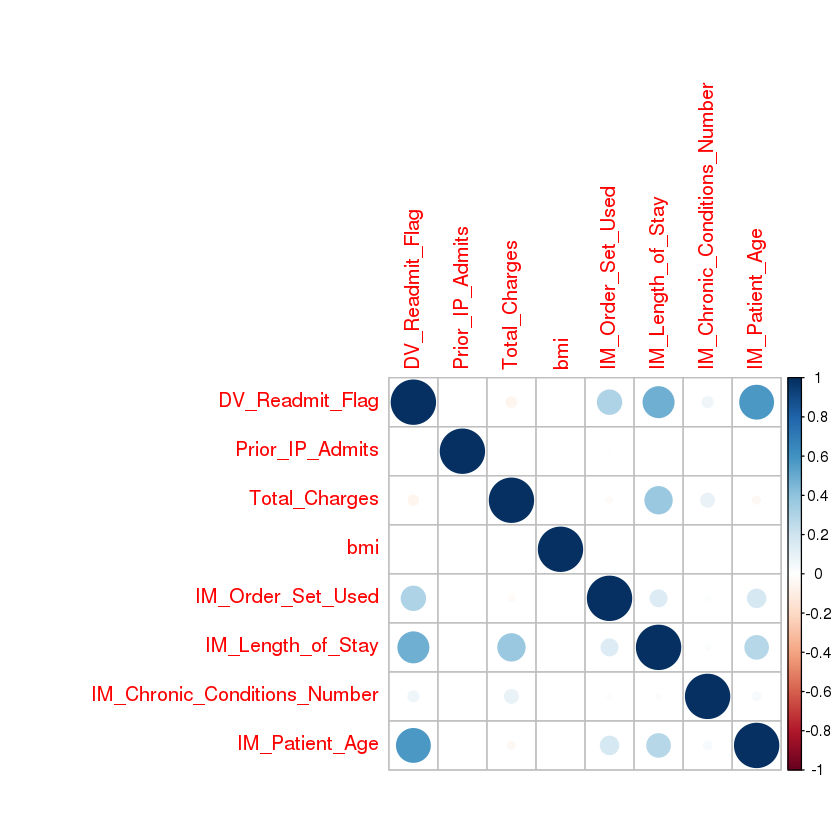

In [6]:
corrplot(as.matrix(readmit_corr[,1:8]))

## Model Building

### Create handles for the target and inputs

In [7]:
char_input <- c("DISCHARGE_NOTES")
num_input   <- c('IM_LENGTH_OF_STAY', 'IM_CHRONIC_CONDITIONS_NUMBER', 'IM_PATIENT_AGE', 'IM_ORDER_SET_USED')
target <- 'readmit'

### Create train and validation datasets

In [8]:
train <- defCasTable(sess,caslib=currentCaslib, 'readmit_imputed', where="_PartInd_=1")
valid <- defCasTable(sess,caslib=currentCaslib, 'readmit_imputed', where="_PartInd_=0")

### Gradient Boosting

In [9]:
loadActionSet(sess, 'decisionTree')
cas.decisionTree.gbtreeTrain(train,
                            target   = target, 
                            inputs   = c(num_input, char_input), 
                            nominals = char_input,
                            varImp   = TRUE,
                            casOut   = list(caslib=currentCaslib, name = 'readmit_imp_gb_R', replace = TRUE),
                            ntree    = 1500,
                            seed     = 1985,
                            nBins    = 20, 
                            maxLevel = 6, 
                            maxBranch= 3, 
                            leafSize = 5, 
                            minUseInSearch=1, 
                            binOrder=TRUE
                            )

NOTE: Added action set 'decisionTree'.
NOTE: Information for action set 'decisionTree':
NOTE:    decisionTree
NOTE:       dtreeTrain - Trains a decision tree
NOTE:       dtreeScore - Scores a table using a decision tree model
NOTE:       dtreeSplit - Splits decision tree nodes
NOTE:       dtreePrune - Prune a decision tree
NOTE:       dtreeMerge - Merges decision tree nodes
NOTE:       dtreeCode - Generates DATA step scoring code from a decision tree model
NOTE:       forestTrain - Trains a forest
NOTE:       forestScore - Scores a table using a forest model
NOTE:       forestCode - Generates DATA step scoring code from a forest model
NOTE:       gbtreeTrain - Trains a gradient boosting tree
NOTE:       gbtreeScore - Scores a table using a gradient boosting tree model
NOTE:       gbtreeCode - Generates DATA step scoring code from a gradient boosting tree model


Descr,Value
Number of Trees,1500.0
Distribution,2.0
Learning Rate,0.1
Subsampling Rate,0.5
Number of Selected Variables (M),5.0
Number of Bins,20.0
Number of Variables,5.0
Max Number of Tree Nodes,289.0
Min Number of Tree Nodes,102.0
Max Number of Branches,3.0


In [10]:
cas.decisionTree.gbtreeScore(valid,
                            modelTable   = list(caslib=currentCaslib, name = 'readmit_imp_gb_R'),
                            copyVars     = list(target, '_PartInd_'),
                            assessonerow = TRUE,
                            casOut       = list(caslib=currentCaslib, name = 'readmit_imp_gb_R_valid', replace = T)
)

$OutputCasTables
  casLib                   Name  Rows Columns
1 Public readmit_imp_gb_R_valid 22702       8

$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                            22702
2 Number of Observations Used                            22702
3 Misclassification Error (%)                     6.9905735178

$ErrorMetricInfo
     TreeID Trees NLeaves        MCR   LogLoss        ASE      RASE     MAXAE
1         0     1     137 0.22473791 0.4665820 0.14938972 0.3865097 0.7969370
2         1     2     279 0.22473791 0.4200400 0.13043168 0.3611533 0.8159212
3         2     3     439 0.22473791 0.3843574 0.11554215 0.3399149 0.8331655
4         3     4     587 0.14597833 0.3553814 0.10352901 0.3217592 0.8488583
5         4     5     739 0.09237072 0.3315709 0.09391823 0.3064608 0.8633597
6         5     6     886 0.08488239 0.3116898 0.08620614 0.2936088 0.8763196
7         6     7    1046 0.07946436 0.2946539 0.07987466 0.2826211 0.8876815
8         7     8    1203 0.07378205 0.2800829 0.07472586 0.2733603 0.8981741
9         8     9    1367 0.07285702 0.2674948 0.07050652 0.2655306 0.9076052
10        9    10    1525 0.07135935 0.2565957 0.06705726 0.2589542 0.9160394
11       10    11    1682 0.06977359 0.2471747 0.06425348 0.2534827 0.9237559
12       11    12    1835 0.06902476 0.2389260 0.06195567 0.2489090 0.9307328
13       12    13    1991 0.06884856 0.2315488 0.05999384 0.2449364 0.9368884
14       13    14    2142 0.06831997 0.2251963 0.05845249 0.2417695 0.9427281
15       14    15    2294 0.06783543 0.2196355 0.05716734 0.2390969 0.9478001
16       15    16    2458 0.06770329 0.2147549 0.05611807 0.2368925 0.9523950
17       16    17    2617 0.06757114 0.2104395 0.05526535 0.2350858 0.9565974
18       17    18    2784 0.06708660 0.2065906 0.05452647 0.2335090 0.9606207
19       18    19    2959 0.06699850 0.2033112 0.05396038 0.2322937 0.9642091
20       19    20    3124 0.06739494 0.2004701 0.05352498 0.2313547 0.9675417
21       20    21    3278 0.06735089 0.1978154 0.05307629 0.2303829 0.9706532
22       21    22    3452 0.06713065 0.1955635 0.05275537 0.2296854 0.9732027
23       22    23    3620 0.06726280 0.1935235 0.05247201 0.2290677 0.9756037
24       23    24    3769 0.06735089 0.1918144 0.05226357 0.2286123 0.9779326
25       24    25    3922 0.06717470 0.1901579 0.05204374 0.2281310 0.9797666
26       25    26    4081 0.06726280 0.1888174 0.05189236 0.2277989 0.9814944
27       26    27    4240 0.06730685 0.1875921 0.05174788 0.2274816 0.9831435
28       27    28    4394 0.06726280 0.1865030 0.05163060 0.2272237 0.9846364
29       28    29    4552 0.06713065 0.1856511 0.05156222 0.2270732 0.9860186
30       29    30    4699 0.06708660 0.1848516 0.05150794 0.2269536 0.9873503
31       30    31    4857 0.06708660 0.1842078 0.05147378 0.2268783 0.9884874
32       31    32    5009 0.06708660 0.1835853 0.05142137 0.2267628 0.9895838
33       32    33    5171 0.06730685 0.1830330 0.05136220 0.2266323 0.9903427
34       33    34    5327 0.06739494 0.1827369 0.05138778 0.2266887 0.9909444
35       34    35    5488 0.06748304 0.1823283 0.05138383 0.2266800 0.9916757
36       35    36    5629 0.06748304 0.1819760 0.05135964 0.2266267 0.9923059
37       36    37    5765 0.06743899 0.1816861 0.05135747 0.2266219 0.9930535
38       37    38    5907 0.06735089 0.1814452 0.05132550 0.2265513 0.9937169
39       38    39    6047 0.06748304 0.1811566 0.05131469 0.2265275 0.9943173
40       39    40    6205 0.06748304 0.1809307 0.05131020 0.2265175 0.9948180
41       40    41    6342 0.06752709 0.1805977 0.05127044 0.2264298 0.9951805
42       41    42    6484 0.06735089 0.1804650 0.05126867 0.2264259 0.9955980
43       42    43    6624 0.06748304 0.1804294 0.05127816 0.2264468 0.9960192
44       43    44    6767 0.06752709 0.1803781 0.05128739 0.2264672 0.9963414
45       44    45    6916 0.06748304 0.1802507 0.05126926 0.2264272 0.9966910
46       45    46    

### Create datasets for assessment plots to be built from

In [11]:
results_gb <- cas.percentile.assess(sess,
                                 table=list(caslib=currentCaslib, name="readmit_imp_gb_R_valid"),
                                 inputs   = c('_GBT_P_Y'),
                                 response = target,
                                 event    = 'Y',
                                 casout=list(caslib=currentCaslib, name="readmit_imp_gb_R_assess")
)

### Promote tables others to use

In [12]:
cas.table.promote(sess,caslib=currentCaslib ,name='readmit_imp_gb_R_valid', 
                  target='readmit_imp_gb_R_valid', targetLib=currentCaslib)
cas.table.promote(sess,caslib=currentCaslib ,name='readmit_imp_gb_r_assess_roc',
                  target='readmit_imp_gb_r_assess_roc', targetLib=currentCaslib)
cas.table.promote(sess,caslib=currentCaslib ,name='readmit_imp_gb_R',
                  target='readmit_imp_gb_R', targetLib=currentCaslib)

list()

list()

list()

### Neural Network

In [13]:
# Load the neural network actionset
loadActionSet(sess, 'neuralNet')

# Train the decision tree model
cas.neuralNet.annTrain(train,
                          hiddens=4,
                          acts='TANH',
                          combs='LINEAR',
                          targetAct='SOFTMAX',
                          errorFunc='ENTROPY',
                          std='MIDRANGE',
                          randDist='UNIFORM',
                          scaleInit=1,
                          target   = target, 
                          inputs   = c(num_input, char_input), 
                          nominals = c(char_input, "readmit"),
                          casOut   = list(caslib='public', name = 'readmit_imp_nn_R', replace = TRUE)
)

NOTE: Added action set 'neuralNet'.
NOTE: Information for action set 'neuralNet':
NOTE:    neuralNet
NOTE:       annTrain - Trains an artificial neural network
NOTE:       annScore - Scores a table using an artificial neural network model
NOTE:       annCode - Generates DATA step scoring code from an artificial neural network model


Progress,Objective,Loss,FitError
1,2.810306,2.810306,0.6773828
2,2.126807,2.126807,0.2247371
3,2.064877,2.064877,0.2247371
4,1.908029,1.908029,0.2247371
5,1.876202,1.876202,0.2226795
6,1.781946,1.781946,0.2030846
7,1.674245,1.674245,0.1476224
8,1.518509,1.518509,0.1375984
9,1.368375,1.368375,0.1181545
10,1.079661,1.079661,0.1032790


### Score the validation data

In [14]:
# Score the validation data
cas.neuralNet.annScore(valid,
                             modelTable   = list(caslib='public', name = 'readmit_imp_nn_R'),
                             copyVars     = list(target, '_PartInd_','DISCHARGE_NOTES','IM_LENGTH_OF_STAY', 'IM_CHRONIC_CONDITIONS_NUMBER', 'IM_PATIENT_AGE', 'IM_ORDER_SET_USED'),
                             assessonerow = TRUE,
                             casOut       = list(caslib="PUBLIC", name = 'readmit_imp_nn_R_valid', replace = T)
)


$OutputCasTables
  casLib                   Name  Rows Columns
1 Public readmit_imp_nn_R_valid 22702      11

$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                            22702
2 Number of Observations Used                            22702
3 Misclassification Error (%)                     10.303056999

### Create datasets for assessment plots to be built from

In [15]:
results_nn <- cas.percentile.assess(sess,
                                 table=list(caslib=currentCaslib, name="readmit_imp_nn_R_valid"),
                                 inputs   = c('_NN_P_Y'),
                                 response = target,
                                 event    = 'Y',
                                 casout=list(caslib=currentCaslib, name="readmit_imp_nn_R_assess")
)

### Promote tables others to use

In [16]:
cas.table.promote(sess,caslib=currentCaslib ,name='readmit_imp_nn_R_valid', 
                  target='readmit_imp_nn_R_valid', targetLib=currentCaslib)
cas.table.promote(sess,caslib=currentCaslib ,name='readmit_imp_nn_r_assess_roc',
                  target='readmit_imp_nn_r_assess_roc', targetLib=currentCaslib)

list()

list()

### End CAS session

In [17]:
cas.session.endSession(sess)

list()